Dr. Gerald Elysee, Instructor

MSHI509E - Clinical Data Mining and Analytics

Module 7 - Natural language Processing (NLP)

NLP Project Google Colab Hands-on Work #2 Instructions: Use relevant Python libraries for Natural Language Processing (NLP) to clean, extract, and analyze relevant medical information from unstructured clinical notes or text to help providers make better decisions for their patients.

Project Title: Natural Language Processing of Clinical Notes on SDOH and Chronic Diseases

Summary: This Natural Language Processing (NLP) project seeks to process the clincal notes from hospital discharges summaries to create a counting appliance that can be used to conduct count frequency summaries to create a counting appliance that can be used to conduct frequency analysis of specific words that are associated with Social Determinants of Health (SDOH) and certain chronic diseases for each patient. For additional information on chronic diseases, visit CDC website, https://www.cdc.gov/chronicdisease/about/index.htm.

In terms of data source for this project, the MIMIC-III (Medical Information Mart for Intensive Care III) modified table, NOTEEVENTS, will be used.

Refer to this link for addition information on MIMIC-III, https://mimic.mit.edu/docs/gettingstarted/

For purposes of this project, table name, NOTEVENTS, has been changed to ClinicalNotes.

This ClinicalNotes.csv dataset has 3 variables: SUBJECT_ID (Patient's unique ID), HADM_ID (Unique ID for each hospital admission), and TEXT (Clinical notes from discharge summaries)

In short, after cleaning the unstructured clinical notes, we'll convert them into vectors reflecting the number of times a word appears in the text, especially providing numerical data that can be used in subsequent machine learning projects. With the vectors, we'll then create an object called countingappliance we'll use to search and count the occurences of specifc words that are associated with Social Determinants of Health (SDOH) and certain chronic conditions.

Let's get started!!!

1. Uploading of the Clinical Notes Dataset in Colab and Using pd to convert it into dataframe structure

In [ ]:
# Import below libraries to open your computer folder system to allow the uploading of the dataset and any images

In [ ]:
from google.colab import files

In [ ]:
from IPython.display import Image

In [ ]:
# Run the below code to upload the image, Methodology with NLK.jpg,
# for the Clinical Text Processing Methodology with NLP

In [ ]:
logo = files.upload() # Remember to click on "Choose Files" to upload the image

Saving Week 7-Methodology1 with NLK.jpg to Week 7-Methodology1 with NLK.jpg


In [ ]:
# just as shown above, copy and paste that same name of image, Methodology with NLK.jpg,
# as argument in the below code

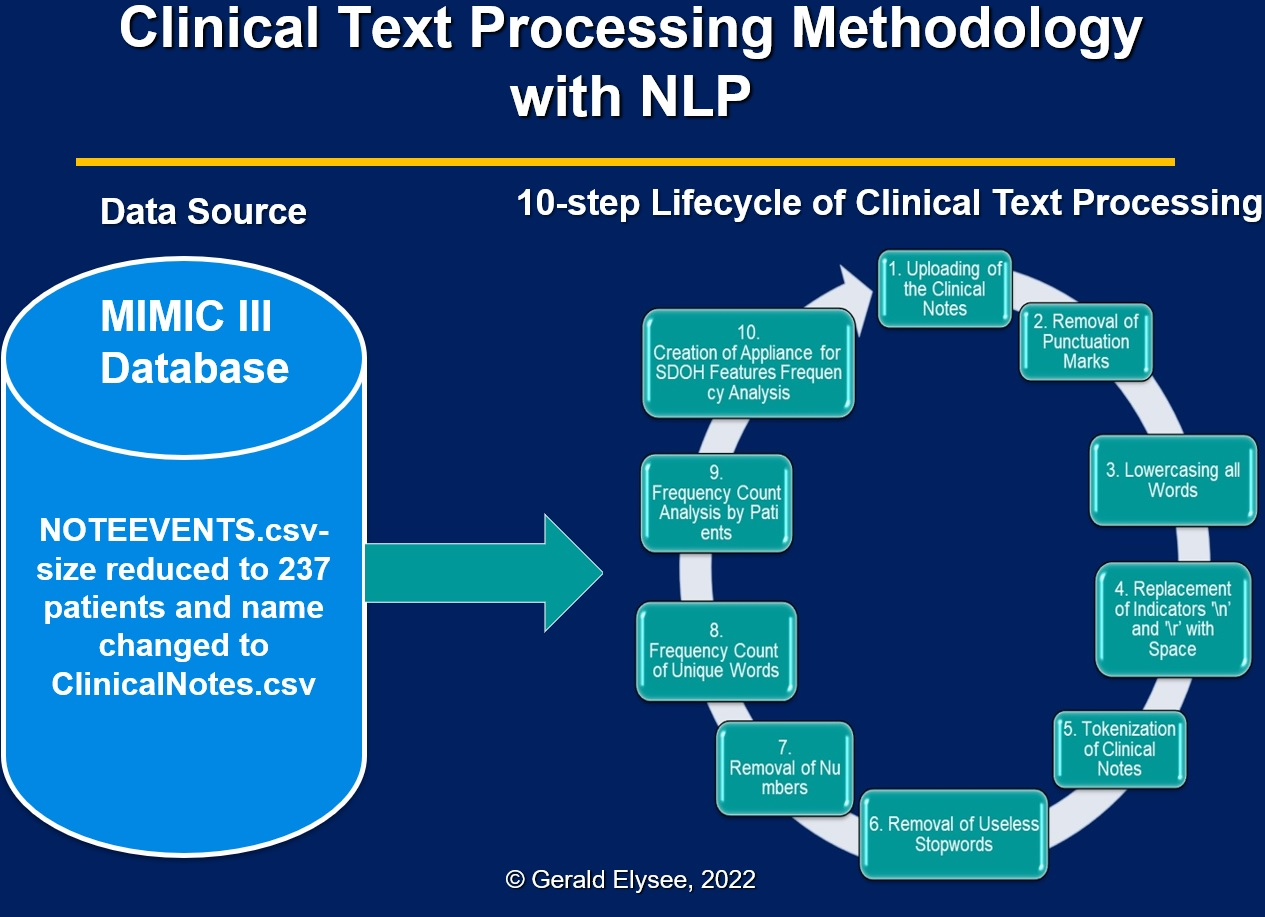

In [ ]:
Image ('Week 7-Methodology1 with NLK.jpg',
       width = 1000)

In [ ]:
# Above image shows the methodology we are going to use includes:
# We'll use to perform the 10 steps of this project lifecycle
# on the data source from the MIMIC III database that has been chnaged to ClinicalNotes.csv,
# which you have a copy of
# Next, upload the ClinicalNotes.csv dataset into the Colav environment

In [ ]:
# Run below code to upload the Clinical Notes dataset into Colab.

In [ ]:
data_file = files.upload()
# Remember to click "Choose Files" below to select the Clinical Notes dataset
# from your computer folder for uploading

Saving Week 7-ClinicalNotes.csv to Week 7-ClinicalNotes.csv


In [ ]:
# Import below library to convert uploaded data into dataframe structure to facilitate
# data preparation, transformation, anf analysis.

In [ ]:
import pandas as pd

In [ ]:
# Run below to ask pandas to read the uploaded Clinical Notes dataset.
# But, use only the 'TEXT' column into dataframe and put it new memory, names "cnotes"

In [ ]:
cnotes = pd.read_csv('Week 7-ClinicalNotes.csv', usecols=['TEXT'])
# Above code allows only the "TEXT" column to be uploaded

In [ ]:
# Run the below code to see the shape of the cnotes dataframe

In [ ]:
cnotes.shape # To give you the number of rows/cases/patients and the number of columns in the dataframe

(327, 1)

In [ ]:
# Above result reveals that cnotes dataframe has 327 cases or patients and 1 column: TEXT

In [ ]:
# Run the below code to enlarge the display the column so that you can see more of the result

In [ ]:
pd.set_option('display.max_colwidth', None) # You can replace "None" with "500"
# to display only 500 characters for each patient

In [ ]:
# Run the below code to display the 1st 5 rows of the dataset

In [ ]:
cnotes.head()

TEXT
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
# 'TEXT' column displayed above contains the clinical notes that we'll need to clean.

In [ ]:
# What's wrong with the clinical notes in the 'TEXT' column? Why do they need to be cleaned?
# It's part of preparing the data for the frequency analysis we'll conduct later
# Follow below steps to clean the Clinical Notes, starting with removing the punctuation marks

2. Removal of Punctuation Marks from the cnotes dataframe

In [ ]:
# Import punctuation library and module

In [ ]:
import string
from string import punctuation

In [ ]:
# Remove punctuation marks using below defined function

In [ ]:
def remove_punctuation(text):
  punctuationfree="".join([i for i in text if i not in punctuation])
# The 'for' loop allows the statement to iterate or loop through all the items in the column
  return punctuationfree

In [ ]:
# Apply the "remove_punctuation" function on the 'TEXT' column
# Then, add a new column, 'punctuationfree_text', to put the new data in

In [ ]:
cnotes['punctuationfree_text']= cnotes['TEXT'].apply(lambda x:remove_punctuation(x))

In [ ]:
cnotes['punctuationfree_text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
# Scroll to the right and see above result shows punctuatuons removed.

In [ ]:
# Run below code to display the names on the columns in cnotes

In [ ]:
# Data types. Try to replace dtypes with columns to get a list of columns
cnotes.dtypes

TEXT                    object
punctuationfree_text    object
dtype: object

In [ ]:
# Above display shows the cnotes dataframe has (2) columns:
# The old one, TEXT, and the new one, punctuationfree_text, we just created

In [ ]:
# Good so far! Next step 3 is to convert all words to lowercase format

3. Lowercasing all Words in the Clinical Notes Stored in Newly Created 'punctuationfree_text' Column

In [ ]:
# Apply below lamba code on the cnotes['punctuationfree_text'] column. to lowercase all words
# Then, add a new column named, cnotes['lower_text'], to put the new data in

In [ ]:
cnotes['lower_text'] = cnotes['punctuationfree_text'].apply(lambda x: x.lower())

In [ ]:
cnotes['lower_text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
# Above cnotes['lower_text'] column has all text with lower case. but, there are a lot backward slashes:
# '\n' representing new lines and '\r' representing carriage returns
# Let's continue cleaning by replacing them with space ''

In [ ]:
# Data types
cnotes.dtypes

TEXT                    object
punctuationfree_text    object
lower_text              object
dtype: object

In [ ]:
# Above shows cnotes dataframe has 3 columns now: TEXT, punctuationfree_text, lower_text

4. Replacement of New lines Indicators '\n' and carriage returns '\r' with Space''

In [ ]:
# Next, we want to clean cnotes['lower_text'] column
# Apply the lambda replace code on 'lower_text' column
# By replacing those new lines indicators shown as backward slashes n '\n' with space ''.
# Then, add a new column named, cnotes['replacedlines_text'], to put the new data in

In [ ]:
cnotes['replacedlines_text'] = cnotes['lower_text'].apply(lambda x: x.replace('\n', ' '))

In [ ]:
cnotes['replacedlines_text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
# Above result shows all '\n' gone. But, but there may be '\r' representing carraige returns we can't see.

In [ ]:
# Replace carriage returns indicators '\r' with space ''
# Then, add a new column named, cnotes['nocarriagereturn_text'],
# to put the new data in with no '\r' indicators

In [ ]:
cnotes['nocarriagereturn_text'] = cnotes['replacedlines_text'].apply(lambda x: x.replace('\r', ' '))

In [ ]:
cnotes['nocarriagereturn_text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

5. Tokenization of Clinical notes in Newly Added cnotes['nocarriagereturn_text'] Column

In [ ]:
# Import word tokenizer
import nltk # Natural Language Toolkit, which contains a series algorithms for natural Language Processing (NLP)
nltk.download('punkt_tab')
from nltk import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
cnotes['tokenized_text'] = cnotes['nocarriagereturn_text'].apply(word_tokenize)

In [ ]:
cnotes['tokenized_text']

0                                                        [admission, date, 2151716, discharge, date, 215184, service, addendum, radiologic, studies, radiologic, studies, also, included, a, chest, ct, which, confirmed, cavitary, lesions, in, the, left, lung, apex, consistent, with, infectious, processtuberculosis, this, also, moderatesized, left, pleural, effusion, head, ct, head, ct, showed, no, intracranial, hemorrhage, or, mass, effect, but, old, infarction, consistent, with, past, medical, history, abdominal, ct, abdominal, ct, showed, lesions, of, t10, and, sacrum, most, likely, secondary, to, osteoporosis, these, can, be, followed, by, repeat, imaging, as, an, outpatient, first, name8, namepattern2, first, name4, namepattern1, 1775, last, name, namepattern1, md, md, number1, 1776, dictated, byhospital, 1807, medquist36, d, 215185, ...]
1                                                                                                                                                                                             [admission, date, 211862, discharge, date, 2118614, date, of, birth, sex, f, service, micu, and, then, to, doctor, last, name, medicine, history, of, present, illness, this, is, an, 81yearold, female, with, a, history, of, emphysema, not, on, home, o2, who, presents, with, three, days, of, shortness, of, breath, thought, by, her, primary, care, doctor, to, be, a, copd, flare, two, days, prior, to, admission, she, was, started, on, a, prednisone, taper, and, one, day, prior, to, admission, she, required, oxygen, at, home, in, order, to, maintain, oxygen, saturation, greater, than, 90, she, has, also, been, on, levofloxacin, and, nebulizers, and, was, ...]
2                                                                                                           [admission, date, 211954, discharge, date, 2119525, service, cardiothoracic, allergies, amlodipine, attendinglast, name, namepattern1, 1561, chief, complaint, 81, yo, f, smoker, w, copd, severe, tbm, sp, tracheobronchoplasty, 55, sp, perc, trach, 513, major, surgical, or, invasive, procedure, bronchoscopy, 331423612, 517, 519, sp, trachealplasty, 55, percutaneous, tracheostomy, 513, after, failed, extubation, down, size, trach, on, 525, to, size, 6, cuffless, history, of, present, illness, this, 81, year, old, woman, has, a, history, of, copd, over, the, past, five, years, she, has, had, progressive, difficulties, with, her, breathing, in, 211864, she, was, admitted, to, hospital1, 18, for, respiratory, failure, due, to, a, copd, ...]
3                                                                           [admission, date, 2124721, discharge, date, 2124818, service, medicine, allergies, amlodipine, attendingfirst, name3, lf, 898, chief, complaint, copd, exacerbationshortness, of, breath, major, surgical, or, invasive, procedure, intubation, arterial, line, placement, picc, line, placement, esophagogastroduodenoscopy, history, of, present, illness, 87, yo, f, with, ho, chf, copd, on, 5, l, oxygen, at, baseline, tracheobronchomalacia, sp, stent, presents, with, acute, dyspnea, over, several, days, and, lethargy, this, morning, patient, developed, an, acute, worsening, in, dyspnea, and, called, ems, ems, found, patient, tachypnic, at, saturating, 90, on, 5l, patient, was, noted, to, be, tripoding, she, was, given, a, nebulizer, and, brought, to, the, er, according, ...]
4                                                                        [admission, date, 216233, discharge, date, 2162325, date, of, birth, 208014, sex, m, service, medicine, allergies, patient, recorded, as, having, no, known, allergies, to, drugs, attendingfirst, name3, lf, 1828, chief, complaint, mr, known, lastname, 1829, was, seen, at, hospital1, 18, after, a, mechanical, fall, from, a, height, of, 10, feet, ct, scan, noted, unstable, fracture, of, c67, posterior, elements, major, surgical, or, invasive, procedure, 1, anterior, cervical, osteotomy, c6c7, with, decompression,

In [ ]:
# Above result shows a tokenized list of words for each row of each patient in the dataset.
# Tokenization means splitting the clinical notes into words

6. Removal of Stopwords from Tokenized Text

In [ ]:
# Remove stopwords which are meaningless and do not add value to the NLP.
# Importation of Natural Language Toolkit (NLTK)
# NLTK contains a series algorithms for Natural Langauge Processing (NLP)
import nltk

In [ ]:
# Libary contains stopwords for the English Language like other, should, can, aren't

In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:50] # Display 50 meaningless words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn']

In [ ]:
# Create below function to remove stopwords

In [ ]:
def remove_stopwords(text):
  output= [i for i in text if i not in stopwords]
# The 'for' loop allows the statement to iterate or lopp through all the items in the column
  return output

In [ ]:
# Apply the remove_stopwords function on the 'tokenized_text' column
# Then, add a new column named, cnotes['no_stopwords_text'], to put the new data in

In [ ]:
cnotes['no_stopwords_text'] = cnotes['tokenized_text'].apply(lambda x:remove_stopwords(x))

In [ ]:
# Looking good! But, there are too many numbers in the clinical notes,
# which are not needed for this exerise
# Let's remove them next!

7. Removal of Numvers from Clinical Notes

In [ ]:
import string

In [ ]:
# Use below code to remove the numbers from cnotes['no stopwords_text']
# Then, add a new column names, cnotes['cleaned_text'], to put the new data in

In [ ]:
cnotes['cleaned_text'] = cnotes['no_stopwords_text'].apply(lambda list_data: [x for x in list_data if x.isalpha()])

In [ ]:
cnotes['cleaned_text']

0                                                                                                                                                                                                                                                                                                                                                                                                  [admission, date, discharge, date, service, addendum, radiologic, studies, radiologic, studies, also, included, chest, ct, confirmed, cavitary, lesions, left, lung, apex, consistent, infectious, processtuberculosis, also, moderatesized, left, pleural, effusion, head, ct, head, ct, showed, intracranial, hemorrhage, mass, effect, old, infarction, consistent, past, medical, history, abdominal, ct, abdominal, ct, showed, lesions, sacrum, likely, secondary, osteoporosis, followed, repeat, imaging, outpatient, first, first, last, name, md, md, dictated, byhospital, job, job, number]
1                                                                                                 [admission, date, discharge, date, date, birth, sex, f, service, micu, doctor, last, name, medicine, history, present, illness, female, history, emphysema, home, presents, three, days, shortness, breath, thought, primary, care, doctor, copd, flare, two, days, prior, admission, started, prednisone, taper, one, day, prior, admission, required, oxygen, home, order, maintain, oxygen, saturation, greater, also, levofloxacin, nebulizers, getting, better, presented, emergency, room, emergency, room, oxygen, saturation, cpap, able, weaned, despite, nebulizer, treatment, solumedrol, mg, iv, review, systems, negative, following, fevers, chills, nausea, vomiting, night, sweats, change, weight, gastrointestinal, complaints, neurologic, changes, rashes, palpitations, orthopnea, positive, following, chest, pressure, occasionally, shortness, breath, exertion, shortness, ...]
2                                                  [admission, date, discharge, date, service, cardiothoracic, allergies, amlodipine, attendinglast, name, chief, complaint, yo, f, smoker, w, copd, severe, tbm, sp, tracheobronchoplasty, sp, perc, trach, major, surgical, invasive, procedure, bronchoscopy, sp, trachealplasty, percutaneous, tracheostomy, failed, extubation, size, trach, size, cuffless, history, present, illness, year, old, woman, history, copd, past, five, years, progressive, difficulties, breathing, admitted, respiratory, failure, due, copd, exacerbation, due, persistent, hypoxemia, required, intubation, eventual, bronchoscopy, revealed, marked, narrowing, airways, expiration, consistent, tracheomalacia, subsequently, underwent, placement, two, silicone, stents, one, left, main, stem, one, trachea, admission, patient, complaints, chest, pain, ruled, mi, subsequently, discharged, physical, pulmonary, rehab, repeat, bronchoscopy, revealed, ...]
3                                                                        [admission, date, discharge, date, service, medicine, allergies, amlodipine, attendingfirst, lf, chief, complaint, copd, exacerbationshortness, breath, major, surgical, invasive, procedure, intubation, arterial, line, placement, picc, line, placement, esophagogastroduodenoscopy, history, present, illness, yo, f, ho, chf, copd, l, oxygen, baseline, tracheobronchomalacia, sp, stent, presents, acute, dyspnea, several, days, lethargy, morning, patient, developed, acute, worsening, dyspnea, called, ems, ems, found, patient, tachypnic, saturating, patient, noted, tripoding, given, nebulizer, brought, er, according, patients, husband, experiencing, symptoms, consistent, prior, copd, flares, apparently, patient, without, cough, chest, pain, fevers, chills, orthopnea, pnd, dysuria, diarrhea, confusion, neck, pain, husband, physician, gave, dose, levaquin, morning, ed, patient, saturating, ...]
4                                [admission, date, discharge, date, date, birth, sex, service, medicine, allergies, 

In [ ]:
# The Clinical notes have been cleaned and are ready for Frequency Analysis
# With CountVectorization or Term Frequency - Inverse Document Frequency (TF-IDF) with scikit-learn

8. Frequency Count of Unique Words with Pandas value_counts() Function from the Counter Module

In [ ]:
import pandas as pd

In [ ]:
from collections import Counter

In [ ]:
count = cnotes['cleaned_text'].explode().value_counts()

In [ ]:
print(count)

cleaned_text
mg                3842
patient           3458
po                3227
tablet            3131
blood             2684
                  ... 
assayfinal           1
previouslyseen       1
distributed          1
predominance         1
smudgy               1
Name: count, Length: 13887, dtype: int64


In [ ]:
pd.set_option("display.max_rows", 10)
# Run this code to display all, pd.set_option('display.max_rows", None),
# to display the counts for all words
# Or change None to 10 to only display 10 words

In [ ]:
print(count)

cleaned_text
mg                3842
patient           3458
po                3227
tablet            3131
blood             2684
                  ... 
assayfinal           1
previouslyseen       1
distributed          1
predominance         1
smudgy               1
Name: count, Length: 13887, dtype: int64


In [ ]:
# For word cloud generation, import libraries and run below codes

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

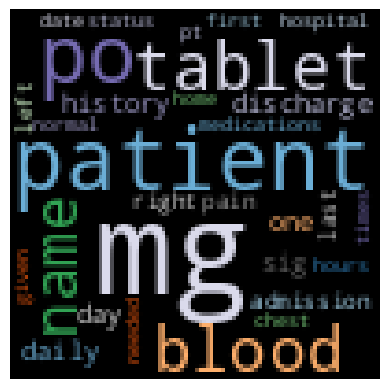

In [ ]:
wc = WordCloud(width=100,
               height=100,
               max_words=100,
               colormap= 'tab20c').generate_from_frequencies(count)

plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
# Use below to normalize or standardize the count based on relative frequencies

In [ ]:
countstd = cnotes['cleaned_text'].explode().value_counts(normalize=True)

In [ ]:
countstd

cleaned_text
mg                0.013310
patient           0.011980
po                0.011180
tablet            0.010847
blood             0.009298
                    ...   
assayfinal        0.000003
previouslyseen    0.000003
distributed       0.000003
predominance      0.000003
smudgy            0.000003
Name: proportion, Length: 13887, dtype: float64

In [ ]:
# So far so good! We just completed step #8. Let's upload the image for the project lifecycle to see where we are at

In [ ]:
logo = files.upload()

Saving Week 7-NLP Project Life Cycle.jpg to Week 7-NLP Project Life Cycle.jpg


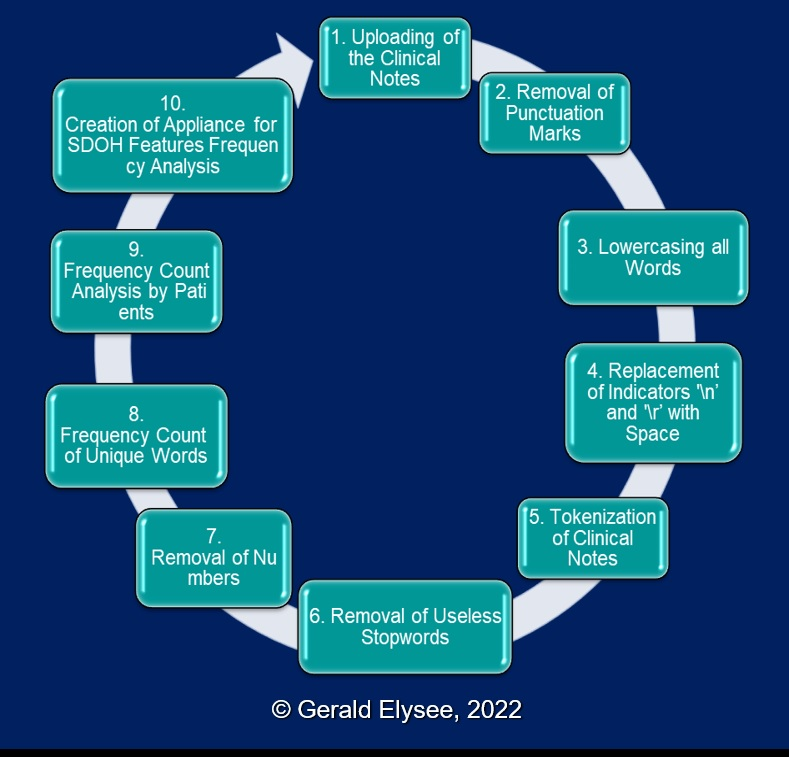

In [ ]:
Image ('Week 7-NLP Project Life Cycle.jpg',
       width = 800)

9. Frequency Count Analysis by Patients Using scikit-learn's CountVectorizer

In [ ]:
# Convert the list in cnotes['cleaned_text'] into a string with single quotes around each word, representing string
# This opens us a whole host of capabilities that can be used for frequency analysis by Patients

In [ ]:
cnotes['cleaned_text_st']=cnotes['cleaned_text'].apply(str)

In [ ]:
cnotes['cleaned_text_st']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
# Above result shows single quotes around each word, representing string
# Now, we perform frequency analysis with vectorization approach
# To find out how many times each word is mentioned in the clinical notes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Bag of Words, a text vectorization approach, reflecting the occurence of each word within clinical notes

In [ ]:
nvectors = CountVectorizer()

In [ ]:
vector_matrix = nvectors.fit_transform(cnotes['cleaned_text_st'])

In [ ]:
vector_matrix

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 155355 stored elements and shape (327, 13869)>

In [ ]:
# Convert this inadequate matrix into an array

In [ ]:
vector_matrix.toarray()
# An array integrates many values from many lists or columns, and put them in only a single column

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

10. Creation of Appliance for SDOH Features Frequency Analysis with Deadly Diseases by Patients

In [ ]:
# For better interpretation, let's create an object and called countingappliance
# That puts them together the vector_matrix and the feature_names or the new columns cross-referencing
# to the patients
# The countingappliance is like a counting device or instrument used
# For searching for specific words and counting the number of times the words they show up for each patient
# Which is more advanced than Pandas' value_counts() Function
# we used above that simply counts without referencing the patients

In [ ]:
countingappliance = pd.DataFrame(vector_matrix.toarray(),
                                 columns=nvectors.get_feature_names_out())
# Above is to create a dataframe with columns/features and thier counts for each patient.
# Result will show 13869 columns or features.
# Better to ask countingappliance to look for SDOH-or chronic diseases-related columns/features you want

In [ ]:
countingappliance

aa  aaa  aagd  aair  aao  aaox  ab  abacavir  abacavirlamivudine  \
0     0    0     0     0    0     0   0         0                   0   
1     0    0     0     0    0     0   0         0                   0   
2     0    0     0     0    0     0   0         0                   0   
3     0    0     0     0    0     0   0         0                   0   
4     0    0     0     0    0     0   0         0                   0   
..   ..  ...   ...   ...  ...   ...  ..       ...                 ...   
322   0    0     0     0    0     0   0         0                   0   
323   0    0     0     0    0     0   0         0                   0   
324   0    0     0     0    0     0   0         0                   0   
325   0    0     0     0    0     0   1         0                   0   
326   0    0     0     0    0     0   1         0                   0   

     abatacept  ...  zone  zonegran  zones  zoster  zostermva  zosyn  \
0            0  ...     0         0      0       0          0      0   
1            0  ...     0         0      0       0          0      0   
2            0  ...     0         0      0       0          0      0   
3            0  ...     0         0      0       0          0      0   
4            0  ...     0         0      0       0          0      0   
..         ...  ...   ...       ...    ...     ...        ...    ...   
322          0  ...     0         0      0       0          0      0   
323          0  ...     0         0      0       0          0      0   
324          0  ...     0         0      0       0          0      0   
325          0  ...     0         0      0       0          0      0   
326          0  ...     0         0      1       0          0      0   

     zosynvanco  zydis  zyprexa  zyrtec  
0             0      0        0       0  
1             0      0        0       0  
2             0      0        1       0  
3             0      0        0       0  
4             0      0        0       0  
..          ...    ...      ...     ...  
322           0      0        0       0  
323           0      0        0       0  
324           0      0        0       0  
325           0      0        0       0  
326           0      0        0       0  

[327 rows x 13869 columns]

In [ ]:
# Let's look at it a different way by transposing the display

In [ ]:
# Run below code to transpose the display

In [ ]:
countingappliance.T.sort_values(by=0, ascending=False).head(50)

0    1    2    3    4    5    6    7    8    9    ...  317  318  \
ct            5    0    0    0   17    1    0    6    2    2  ...    0    0   
head          2    2    3    1    3    3    0    6    2    3  ...    0    0   
job           2    2    0    0    0    0    0    0    0    0  ...    0    0   
consistent    2    2    1    3    0    1    1    0    2    0  ...    0    0   
showed        2    2    0    1    1    1    1    2    1    1  ...    0    6   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
effect        1    0    0    0    0    0    0    0    0    1  ...    1    0   
imaging       1    1    0    1    1    0    0    0    0    0  ...    0    0   
outpatient    1    4    0    0    0    0    0    0    0    1  ...    0    0   
infectious    1    0    0    0    0    0    1    0    0    0  ...    0    0   
discharge     1    5    6    8    7    7    7   10    8    8  ...    6    6   

            319  320  321  322  323  324  325  326  
ct            3    0    2    0    0    5    0    8  
head          0    2    0    0    0    0    1    0  
job           0    0    0    0    0    0    0    0  
consistent    2    0    0    0    0    1    1    2  
showed        3    0    1    0    0    0    4    3  
...         ...  ...  ...  ...  ...  ...  ...  ...  
effect        0    1    1    0    0    0    0    0  
imaging       1    0    0    0    0    1    0    2  
outpatient    4    0    0    0    0    0    4    3  
infectious    0    0    1    0    0    1    0    0  
discharge     7    6   14    7   10    9    7   16  

[50 rows x 327 columns]

In [ ]:
# Use the counting appliance to search for different words to see how many times
# they are mentioned for each of the 327 patients
# These words are associated with diseases that are the leading causes of death in the US
# According to CDC, https://www.cdc.gov/nchs/fastats/leading-causes-of-death.html

In [ ]:
countingappliance[['coronary', 'stroke', 'pneumonia', 'pulmonary', 'cancer', 'diabetes',
                  'alzheimer', 'tuberculosis', 'cirrhosis', 'pneumonia']]

coronary  stroke  pneumonia  pulmonary  cancer  diabetes  alzheimer  \
0           0       0          0          0       0         0          0   
1           0       0          2          4       0         0          0   
2           1       0          0          1       0         0          0   
3           1       0          2          5       0         0          0   
4           1       1          3          1       0         0          0   
..        ...     ...        ...        ...     ...       ...        ...   
322         0       0          0          3       0         0          0   
323         0       0          0          0       0         0          0   
324         0       0          4          2       3         3          0   
325         0       1          2          4       1         0          0   
326         1       2          4         21       0         0          0   

     tuberculosis  cirrhosis  pneumonia  
0               0          0          0  
1               0          0          2  
2               0          0          0  
3               0          0          2  
4               0          0          3  
..            ...        ...        ...  
322             0          0          0  
323             0          0          0  
324             0          0          4  
325             0          0          2  
326             0          0          4  

[327 rows x 10 columns]

In [ ]:
# If you get KeyError like the below.
# KeyError: "['word1' , 'word2'] not in index"
# Just remove those words from the countingappliance and any others that give you error.
# Run the below codes to import relevant libraries and upload the
# image for Social Determinants of Health

In [ ]:
from IPython.display import Image

In [ ]:
logo = files.upload()

Saving Week 7-Social Determinants of Health.jpg to Week 7-Social Determinants of Health.jpg


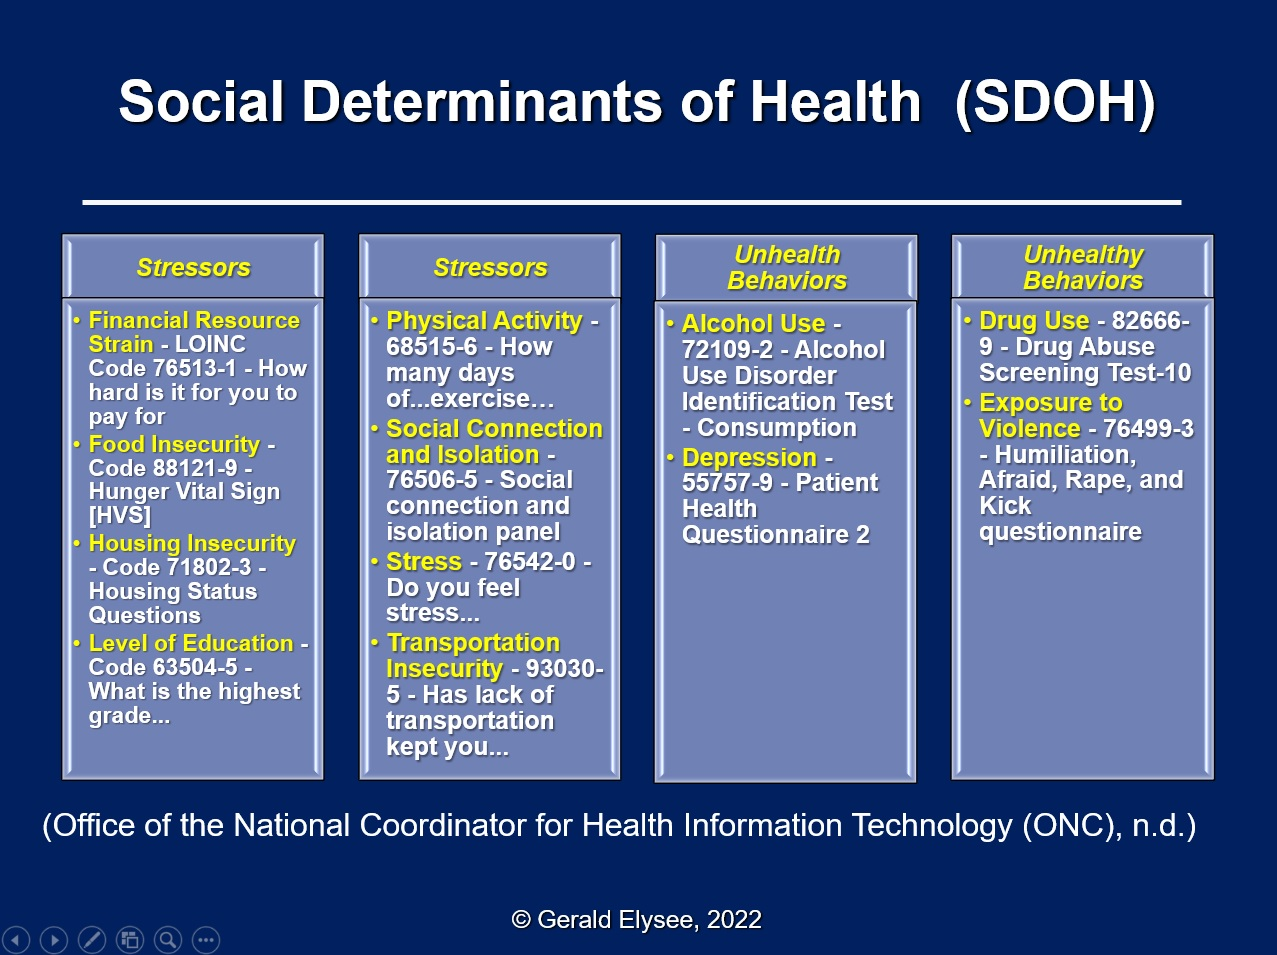

In [ ]:
Image ('Week 7-Social Determinants of Health.jpg',
       width = 1000)

In [ ]:
# Let's add some of Social Determinants of Health (SDOH) features to the counting appliance
# Such as 'housing', 'nutrition', 'food', 'diet', 'exercise', 'physical',
# 'transportation', 'alcohol', 'drug', 'violence', 'depression', 'access'
# And see if there are any SDOH in patients' clinical notes
# If you get KeyError like the below
# KeyError: "['word1', 'word2'] not in index"
# Just remove those words from the countingappliance and any others that give you error.

In [ ]:
countingappliance[['housing', 'nutrition', 'food', 'diet', 'exercise', 'physical',
                  'transportation', 'alcohol', 'drug', 'violence', 'depression',
                  'access', 'coronary', 'stroke', 'pneumonia', 'pulmonary',
                  'cancer', 'diabetes', 'alzheimer', 'tuberculosis', 'cirrhosis']]

housing  nutrition  food  diet  exercise  physical  transportation  \
0          0          0     0     0         0         0               0   
1          0          0     0     0         0         4               0   
2          0          1     0     1         0         2               0   
3          0          1     0     0         0         2               0   
4          0          1     0     0         0         2               0   
..       ...        ...   ...   ...       ...       ...             ...   
322        0          0     0     0         0         1               0   
323        0          0     0     1         0         1               0   
324        0          0     0     1         0         1               0   
325        0          0     0     0         0         1               0   
326        0          0     0     0         0         3               0   

     alcohol  drug  violence  ...  access  coronary  stroke  pneumonia  \
0          0     0         0  ...       0         0       0          0   
1          1     0         0  ...       0         0       0          2   
2          0     0         0  ...       2         1       0          0   
3          0     0         0  ...       1         1       0          2   
4          0     0         0  ...       0         1       1          3   
..       ...   ...       ...  ...     ...       ...     ...        ...   
322        1     1         0  ...       0         0       0          0   
323        0     0         0  ...       0         0       0          0   
324        0     0         0  ...       1         0       0          4   
325        0     1         0  ...       0         0       1          2   
326        0     1         0  ...       0         1       2          4   

     pulmonary  cancer  diabetes  alzheimer  tuberculosis  cirrhosis  
0            0       0         0          0             0          0  
1            4       0         0          0             0          0  
2            1       0         0          0             0          0  
3            5       0         0          0             0          0  
4            1       0         0          0             0          0  
..         ...     ...       ...        ...           ...        ...  
322          3       0         0          0             0          0  
323          0       0         0          0             0          0  
324          2       3         3          0             0          0  
325          4       1         0          0             0          0  
326         21       0         0          0             0          0  

[327 rows x 21 columns]

In [ ]:
# For example, for Patient #326, 'drug' is mentioned once, 'coronary' once,
# 'stroke' twice, 'pneumonia' 4 times
# 'pulmonary' 21 times

In [ ]:
# Run the below code to display all 327 rows of data to see all patients

In [ ]:
pd.set_option("display.max_rows", None) # To display all 327 rows of data

In [ ]:
# Run the counting appliance again with SDOH words to see all of the patients.
# If you get KeyError like the below.
# KeyError: "['word1', 'word2'] not in index"
# Just remove those words from the countingappliance and any others that give you error.

In [ ]:
countingappliance[['housing', 'nutrition', 'food', 'diet', 'exercise', 'physical',
                  'transportation', 'alcohol', 'drug', 'violence', 'depression',
                  'access', 'coronary', 'stroke', 'pneumonia', 'pulmonary','cancer',
                  'diabetes', 'alzheimer', 'tuberculosis', 'cirrhosis']]

housing  nutrition  food  diet  exercise  physical  transportation  \
0          0          0     0     0         0         0               0   
1          0          0     0     0         0         4               0   
2          0          1     0     1         0         2               0   
3          0          1     0     0         0         2               0   
4          0          1     0     0         0         2               0   
5          0          0     0     1         1         1               0   
6          0          0     0     0         0         1               0   
7          0          0     0     0         1         2               0   
8          0          0     1     0         1         1               0   
9          0          0     0     1         1         1               0   
10         0          0     0     0         1         1               0   
11         0          0     0     0         0         1               0   
12         0          0     0     0         0         0               0   
13         0          0     0     0         0         0               0   
14         0          0     0     1         0         2               0   
15         0          0     0     0         0         1               0   
16         0          0     0     2         0         1               0   
17         0          0     0     0         0         1               0   
18         0          0     0     0         0         2               0   
19         0          0     0     1         0         2               0   
20         0          0     0     0         0         2               0   
21         0          0     0     2         0         1               0   
22         0          0     2     0         0         1               0   
23         0          0     0     0         0         1               0   
24         0          0     0     2         0         1               0   
25         0          0     0     0         0         1               0   
26         0          1     0     0         0         1               0   
27         0          0     0     1         0         2               0   
28         0          0     0     1         0         1               0   
29         0          0     0     0         0         4               0   
30         0          0     0     0         0         1               0   
31         0          0     0     0         0         1               0   
32         0          0     0     0         0         1               0   
33         0          0     0     0         0         1               0   
34         0          0     0     0         0         0               0   
35         0          0     0     0         0         1               0   
36         0          0     0     0         0         1               0   
37         0          0     0     0         0         1               0   
38         0          0     0     0         0         2               0   
39         0          0     0     1         0         1               0   
40         0          0     0     1         0         1               0   
41         0          0     0     0         0         3               0   
42         0          0     0     0         0         1               0   
43         0          0     0     0         0         1               0   
44         0          0     0     0         2         1               0   
45         0          0     0     0         0         1               0   
46         0          0     0     0         0         1               0   
47         0          0     0     1         0         1               0   
48         0          0     0     0         0         2               2   
49         0          0     0     0         0         1               0   
50         0          0     0     0         0         2               0   
51         1          0     0     0         0         1               0   
52         1          0     0 

In [ ]:
# Remember we are only using a small subset of the original NOTEEVENTS.csv dataset.
# For a full-fledged project, we would use the full dataset.
# Then, the above can be combined/merged with other datasets that have the target or
# dependent variable, with which you can build predictictive models.
# However, more cleaning should be performed, and stopwords (no value) removed
# Machine learning algorithms can then be used to create models to predict readmissions
# and other patient outcomes for patients that have a combination of
# those words in their clinical notes
# However, we would need to purchase more processing power from Google Colab
# to be able to process these large datasets

In [ ]:
# For Patients #200 and #313, explain in below cell(s) your interpretation
# of the frequency of words...
# Related to SDOH and some of the chronic diseases discussed on the CDC website.
# https://www.cdc.gov/chronicdisease/about/index.html

As indicated in Canvas (Google Colab Hands-on Work #2), your explanation of your findings should meet the following requirements:

In [ ]:
data_file = files.upload()

Saving Abdulkadir_NLP.docx to Abdulkadir_NLP.docx


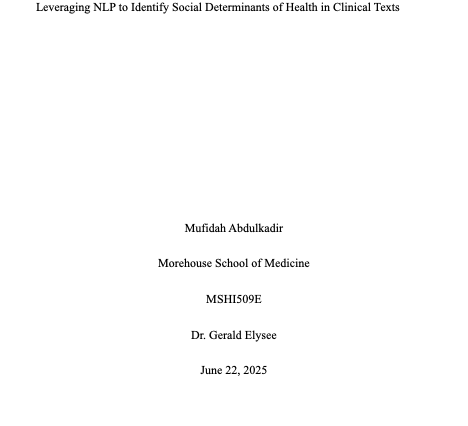

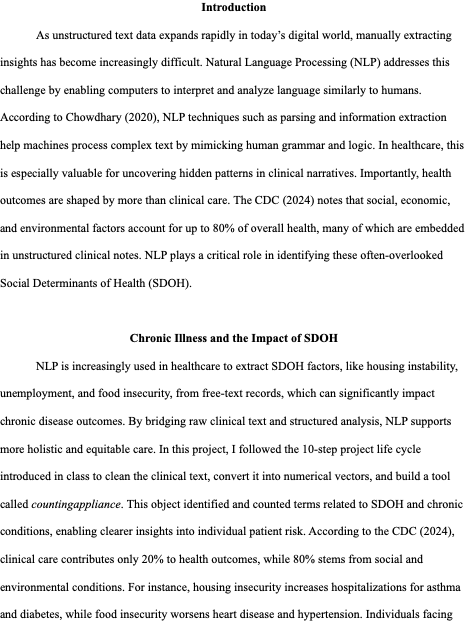

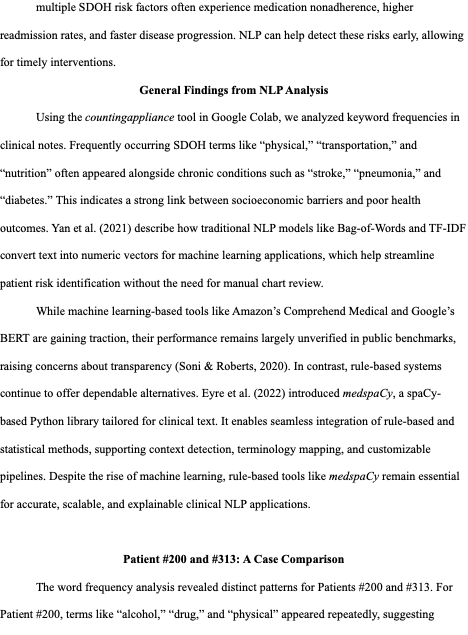

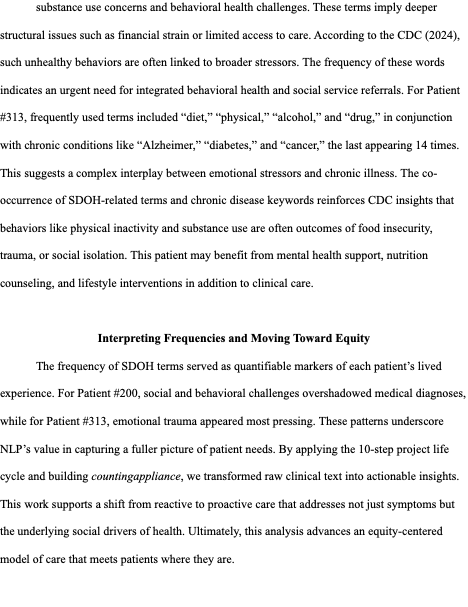

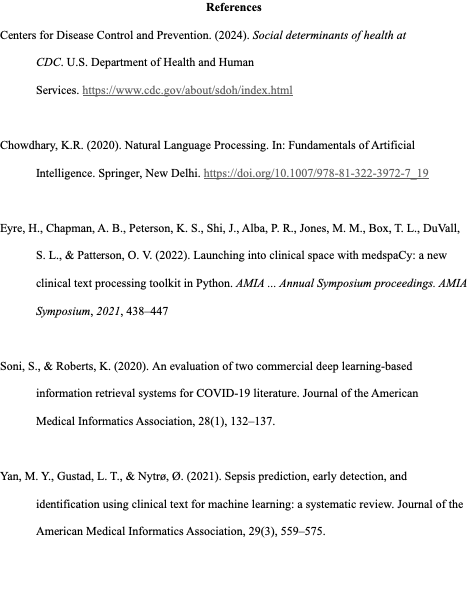